In [1]:
import pandas as pd
from pycaret.clustering import *

In [2]:
# DB에 연결
import sys
sys.path.append('/Users/nezmi/Projects/yeznable_projects')

from LAB.Data_collection import functions_for_db
from personal import id_pw_classes

mysql_user = id_pw_classes.mysql()

host = '127.0.0.1'
user = mysql_user.id_yeznable
password = mysql_user.pw_yeznable
db = 'GSEnTec'

In [3]:
# create connecttion and cursor
connection = functions_for_db.get_connection(host,user,password,db)
cursor = connection.cursor()
print('DB connected...')

DB connected...


In [4]:
query_get_column = f"""show columns from MART"""
cursor.execute(query_get_column)
columns = cursor.fetchall()
list_columns = []
for column in columns:
    list_columns.append(column[0])
# list_columns

In [5]:
query_get_data = f"""SELECT * FROM MART WHERE 재직구분 = 0"""
cursor.execute(query_get_data)
data = cursor.fetchall()
df = pd.DataFrame(data)
df.columns = list_columns
# df.to_csv('data2.csv', encoding='euc-kr')
# df

In [6]:
connection.close()

In [ ]:
# df.drop(['id','사원구분',
#  '고용형태',
#  '직군',
#  '직종',
#  '최종학력',
#  '성별구분',
#  '재직구분','pp_longevity','pp_longevity_5y'], axis='columns', inplace=True)
# df

In [8]:
exp_clu101 = setup(df, normalize = True, 
                   ignore_features = ['id'],
                   session_id = 123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Original Data,"(1174, 65)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,59
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(1174, 296)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [9]:
kmeans = create_model('kmeans')

,Metric
Silhouette,0.0833
Calinski-Harabasz,112.0211
Davies-Bouldin,2.4877


In [10]:
plot_model(kmeans)

In [14]:
plot_model(kmeans, plot ='tsne')

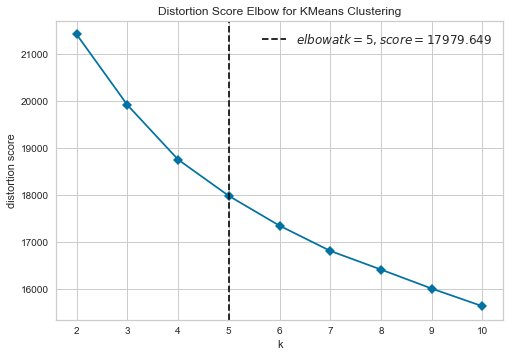

In [11]:
plot_model(kmeans, plot = 'elbow')

In [12]:
plot_model(kmeans, plot = 'distribution')

In [17]:
kmean_results = assign_model(kmeans)
kmean_results.head()
# kmean_results.to_csv('kmean_results.csv', encoding='euc-kr')

,id,사원구분,고용형태,직군,직종,최종학력,성별구분,재직구분,korean,pp_religion,...,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity,pp_longevity_5y,pp_longevity_10y,Cluster
0,1,연봉(직원),상용직,임원,정규직,대학원졸,M,0,1,0,...,0,0,1,0,0,0,370,1,1,Cluster 1
1,2,연봉(현장),상용직,기술직,촉탁직,대졸,M,0,1,0,...,0,0,1,0,0,0,354,1,1,Cluster 1
2,3,연봉(현장),상용직,기술직,정규직,대졸,M,0,1,0,...,0,0,1,0,0,0,264,1,1,Cluster 1
3,4,연봉(직원),상용직,사무직,정규직,대졸,M,0,1,1,...,1,0,0,0,1,0,258,1,1,Cluster 1
4,5,시급(현장),상용직,사무직,정규직,대졸,M,0,1,0,...,0,0,0,0,0,0,211,1,1,Cluster 1
